# Debugging notebook for alphaDIA
This notebooks allows you to run a search in a jupyter notebook and debug the results.
It allows you to debug a search on the workflow level as well on the peakgroup level

## Requirements
- conda environment with latest alphadia (developer version, extra 'stable', tag v1.9.3-dev2)
- mono installed

In [1]:
%reload_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

from alphadia import search_step
from alphadia.workflow import peptidecentric

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
/opt/homebrew/anaconda3/envs/alphadia-validate/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Set up folder

In [8]:
base_folder = "/Users/mschwoerer/work/hackathon/data/alphadia-validate/"

## Obtain raw data

In [5]:
data_folder = f"{base_folder}/data"
output_folder = f"{base_folder}/output"

for folder in [data_folder, output_folder]:
    if not os.path.exists(folder):
        os.makedirs(folder)

# HeLa library as used in the getting started guide
library_url = "https://datashare.biochem.mpg.de/s/Uw2yfNSbApfPpTk"

# Bulk injections of HeLa cell lysate acquired on the Orbitrap Astral
raw_data_url_list = [
    "https://datashare.biochem.mpg.de/s/339jg5HtGrwLwDN/download?files=20231017_OA2_TiHe_ADIAMA_HeLa_200ng_Evo011_21min_F-40_07.raw",
]

from alphadia.test_data_downloader import DataShareDownloader

library_path = DataShareDownloader(library_url, data_folder).download()
raw_data_path_list = [
    DataShareDownloader(url, data_folder).download() for url in raw_data_url_list
]

/Users/mschwoerer/work/hackathon/data/alphadia-validate//data/hela_hybrid.hdf already exists
/Users/mschwoerer/work/hackathon/data/alphadia-validate//data/20231017_OA2_TiHe_ADIAMA_HeLa_200ng_Evo011_21min_F-40_07.raw already exists


## Run search

In [6]:
# raw_data_path_list = [
#     f"{base_folder}/data/20231017_OA2_TiHe_ADIAMA_HeLa_200ng_Evo011_21min_F-40_07.raw"
# ]
# library_path = f"{base_folder}/data/hela_hybrid.hdf"

0:01:29.857691 INFO: loading config from /opt/homebrew/anaconda3/envs/alphadia-validate/lib/python3.11/site-packages/alphadia/constants/default.yaml
0:01:29.868349 INFO: loading additional config provided via CLI
0:01:29.868893 INFO: Updating config with 'user defined'
0:01:29.869197 INFO: ├──version: 1
0:01:29.869446 INFO: ├──workflow_name: None
0:01:29.869664 INFO: ├──output_directory: None
0:01:29.869879 INFO: ├──library_path: /Users/mschwoerer/work/hackathon/data/alphadia-validate//data/hela_hybrid.hdf [user defined, default: None]
0:01:29.870122 INFO: ├──raw_paths:
0:01:29.870338 INFO: │   - /Users/mschwoerer/work/hackathon/data/alphadia-validate//data/20231017_OA2_TiHe_ADIAMA_HeLa_200ng_Evo011_21min_F-40_07.raw [user defined, default: None]
0:01:29.870614 INFO: ├──fasta_paths:
0:01:29.870863 INFO: ├──quant_directory: None
0:01:29.871033 INFO: ├──general
0:01:29.871292 INFO: │   ├──thread_count: 10
0:01:29.871583 INFO: │   ├──reuse_calibration: False
0:01:29.871827 INFO: │   ├──re

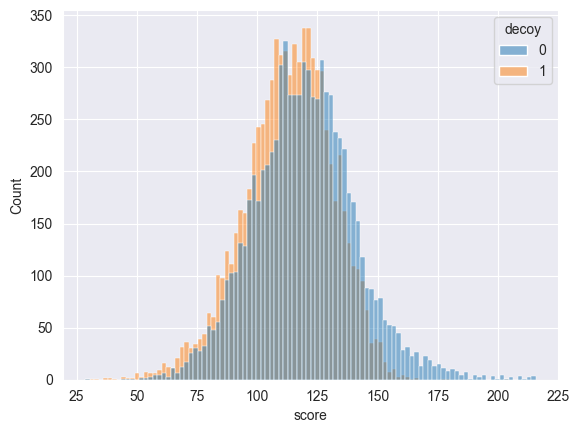

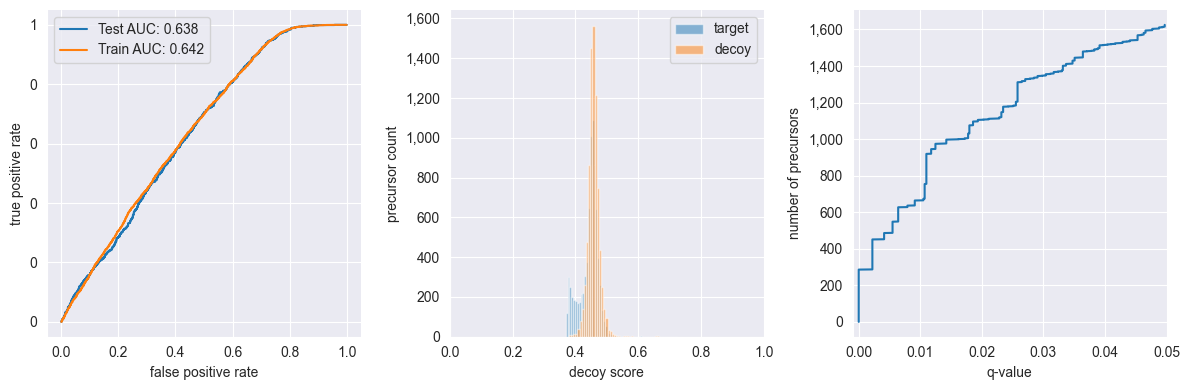

0:03:10.660294 INFO: Resetting torch num_threads to 10
0:03:10.661278 INFO: === FDR correction performed with classifier version -1 ===
0:03:10.662589 PROGRESS: ============================= Precursor FDR =============================
0:03:10.663016 PROGRESS: Total precursors accumulated: 1,858
0:03:10.663481 PROGRESS: Target precursors: 1,723 (92.73%)
0:03:10.663794 PROGRESS: Decoy precursors: 135 (7.27%)
0:03:10.664062 PROGRESS: 
0:03:10.664322 PROGRESS: Precursor Summary:
0:03:10.665835 PROGRESS: Channel   0:	 0.05 FDR: 1,549; 0.01 FDR:   659; 0.001 FDR:   287
0:03:10.666229 PROGRESS: 
0:03:10.666593 PROGRESS: Protein Summary:
0:03:10.668248 PROGRESS: Channel   0:	 0.05 FDR: 1,242; 0.01 FDR:   539; 0.001 FDR:   248
0:03:10.668582 PROGRESS: =========================================================================
0:03:10.671611 INFO: fragments_df_filtered: 5000
0:03:10.691848 INFO: calibration group: precursor, fitting mz estimator 


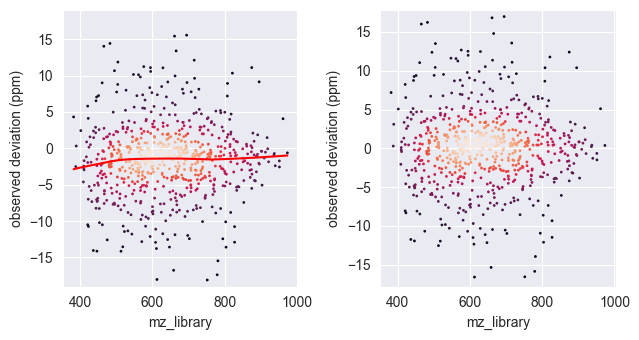

0:03:10.824326 INFO: calibration group: precursor, fitting rt estimator 


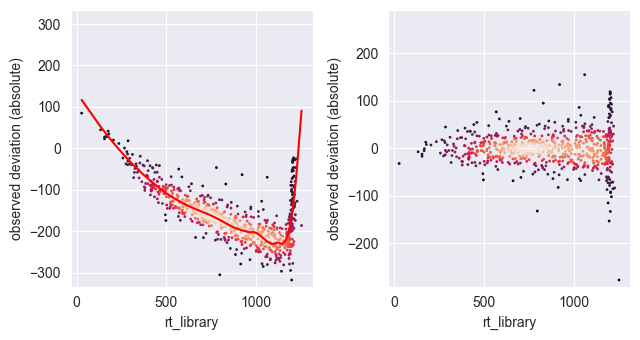

0:03:10.936525 INFO: calibration group: fragment, fitting mz estimator 


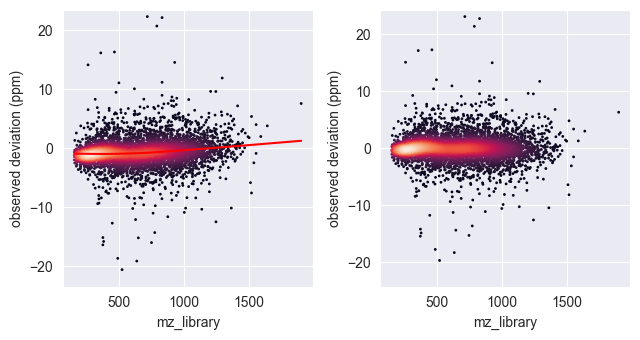

0:03:11.422154 INFO: calibration group: precursor, predicting mz
0:03:11.424373 INFO: calibration group: precursor, predicting rt
0:03:11.428357 INFO: calibration group: fragment, predicting mz
0:03:11.453232 PROGRESS: Required number of precursors found. Starting search parameter optimization.
0:03:11.454761 INFO: Starting optimization step 1.
0:03:11.459305 PROGRESS: === Extracting elution groups 0 to 8000 ===
0:03:11.460605 PROGRESS: Extracting batch of 15881 precursors
0:03:11.474223 INFO: Duty cycle consists of 301 frames, 1.55 seconds cycle time
0:03:11.477414 INFO: Duty cycle consists of 1 scans, 0.00000 1/K_0 resolution
0:03:11.478349 INFO: FWHM in RT is 3.75 seconds, sigma is 0.51
0:03:11.480212 INFO: FWHM in mobility is 0.000 1/K_0, sigma is 1.00
0:03:11.483962 INFO: Starting candidate selection
100%|██████████| 15881/15881 [00:03<00:00, 4720.21it/s]
0:03:14.931300 INFO: Starting candidate scoring
100%|██████████| 31762/31762 [00:00<00:00, 69427.42it/s]
0:03:15.412715 INFO: F

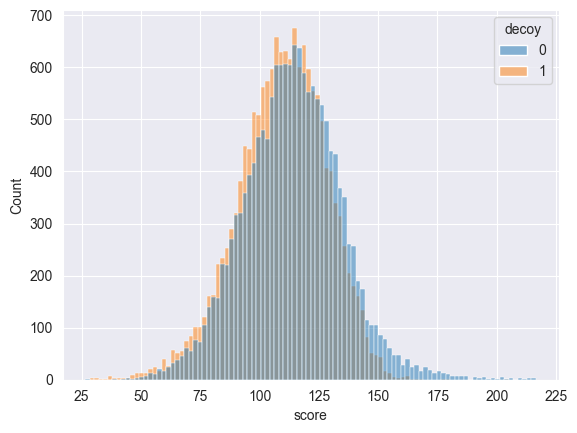

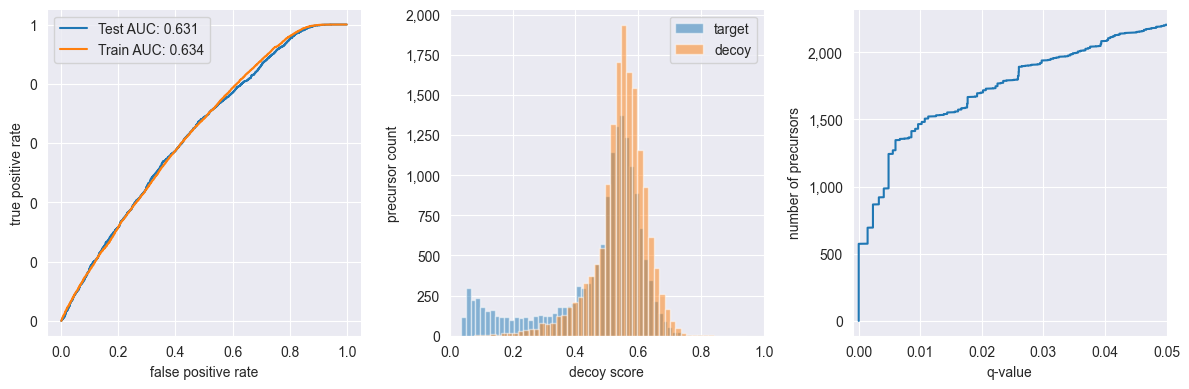

0:03:15.982142 INFO: Resetting torch num_threads to 10
0:03:15.983277 INFO: === FDR correction performed with classifier version 0 ===
0:03:15.984625 PROGRESS: ============================= Precursor FDR =============================
0:03:15.985050 PROGRESS: Total precursors accumulated: 2,414
0:03:15.985485 PROGRESS: Target precursors: 2,259 (93.58%)
0:03:15.985923 PROGRESS: Decoy precursors: 155 (6.42%)
0:03:15.986272 PROGRESS: 
0:03:15.986782 PROGRESS: Precursor Summary:
0:03:15.988424 PROGRESS: Channel   0:	 0.05 FDR: 2,103; 0.01 FDR: 1,452; 0.001 FDR:   575
0:03:15.988814 PROGRESS: 
0:03:15.989242 PROGRESS: Protein Summary:
0:03:15.991404 PROGRESS: Channel   0:	 0.05 FDR: 1,606; 0.01 FDR: 1,146; 0.001 FDR:   475
0:03:15.991839 PROGRESS: =========================================================================
0:03:15.999090 INFO: fragments_df_filtered: 5000
0:03:16.020399 INFO: calibration group: precursor, fitting mz estimator 


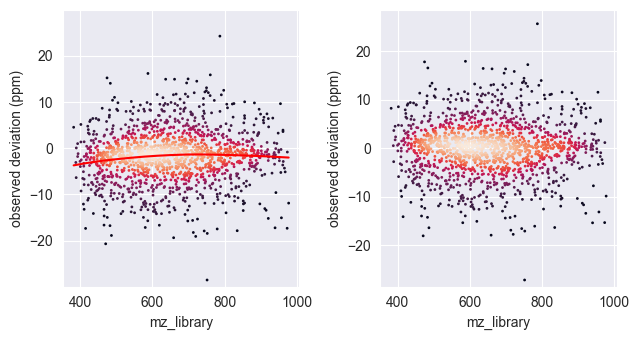

0:03:16.152361 INFO: calibration group: precursor, fitting rt estimator 


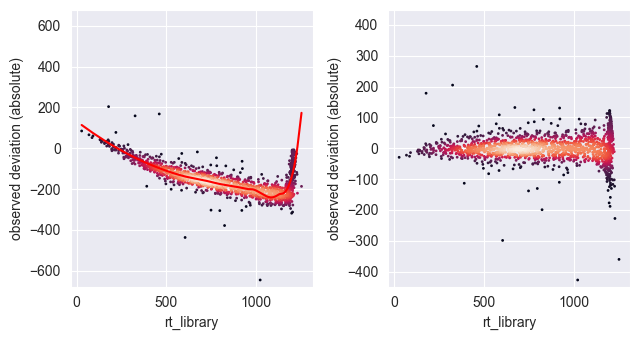

0:03:16.336338 INFO: calibration group: fragment, fitting mz estimator 


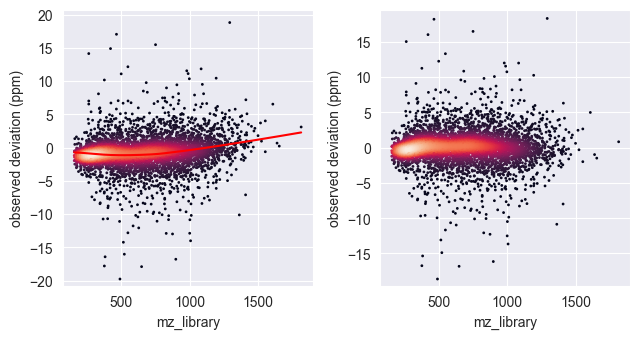

0:03:16.889654 INFO: calibration group: precursor, predicting mz
0:03:16.892053 INFO: calibration group: precursor, predicting rt
0:03:16.895739 INFO: calibration group: fragment, predicting mz
0:03:16.917428 INFO: === checking if optimization conditions were reached ===
0:03:16.921839 PROGRESS: ❌ ms2_error      : 7.0000 > 7.0000 or insufficient steps taken.
0:03:16.932388 PROGRESS: ❌ ms1_error      : 11.6293 > 4.0000 or insufficient steps taken.
0:03:16.941730 INFO: ==============================================
0:03:16.956610 INFO: Starting optimization step 2.
0:03:16.968510 PROGRESS: === Extracting elution groups 0 to 8000 ===
0:03:16.996519 PROGRESS: Extracting batch of 15881 precursors
0:03:17.001998 INFO: Duty cycle consists of 301 frames, 1.55 seconds cycle time
0:03:17.008469 INFO: Duty cycle consists of 1 scans, 0.00000 1/K_0 resolution
0:03:17.009144 INFO: FWHM in RT is 3.61 seconds, sigma is 0.49
0:03:17.010161 INFO: FWHM in mobility is 0.000 1/K_0, sigma is 1.00
0:03:17.02

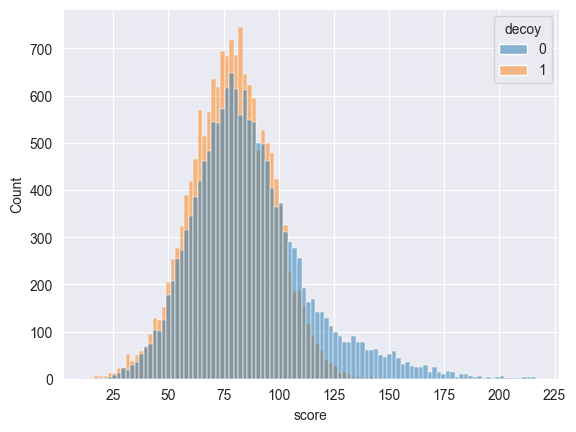

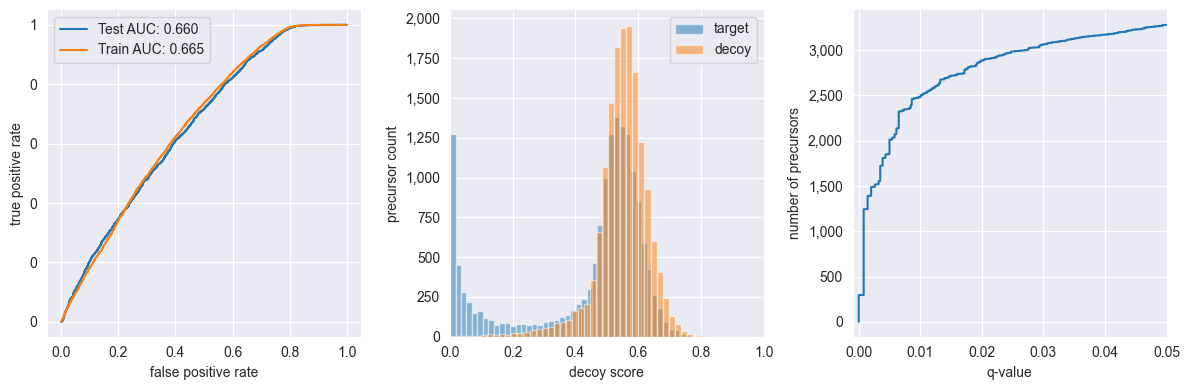

0:03:21.590754 INFO: Resetting torch num_threads to 10
0:03:21.592028 INFO: === FDR correction performed with classifier version 1 ===
0:03:21.593986 PROGRESS: ============================= Precursor FDR =============================
0:03:21.594393 PROGRESS: Total precursors accumulated: 3,372
0:03:21.594782 PROGRESS: Target precursors: 3,189 (94.57%)
0:03:21.595112 PROGRESS: Decoy precursors: 183 (5.43%)
0:03:21.595488 PROGRESS: 
0:03:21.595828 PROGRESS: Precursor Summary:
0:03:21.597797 PROGRESS: Channel   0:	 0.05 FDR: 3,123; 0.01 FDR: 2,458; 0.001 FDR: 1,243
0:03:21.598188 PROGRESS: 
0:03:21.598561 PROGRESS: Protein Summary:
0:03:21.600912 PROGRESS: Channel   0:	 0.05 FDR: 2,265; 0.01 FDR: 1,851; 0.001 FDR: 1,005
0:03:21.601233 PROGRESS: =========================================================================
0:03:21.610102 INFO: fragments_df_filtered: 5000
0:03:21.630503 INFO: calibration group: precursor, fitting mz estimator 


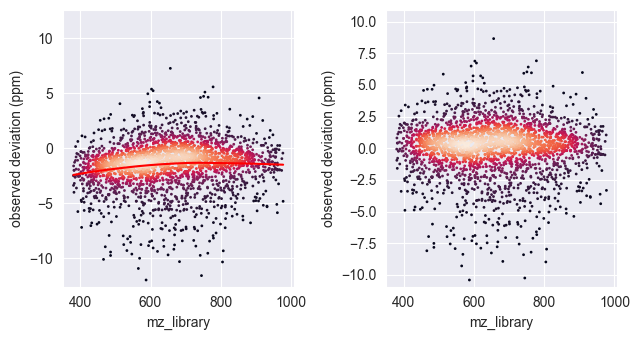

0:03:21.877805 INFO: calibration group: precursor, fitting rt estimator 


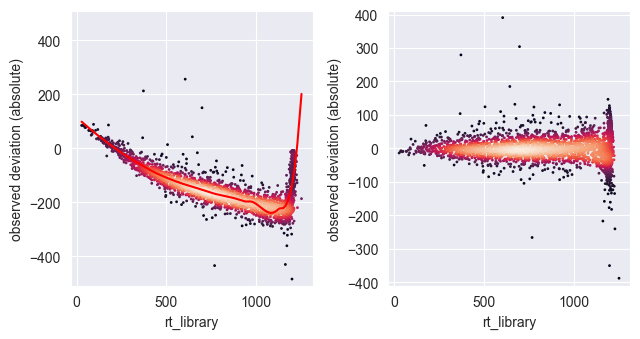

0:03:22.114597 INFO: calibration group: fragment, fitting mz estimator 


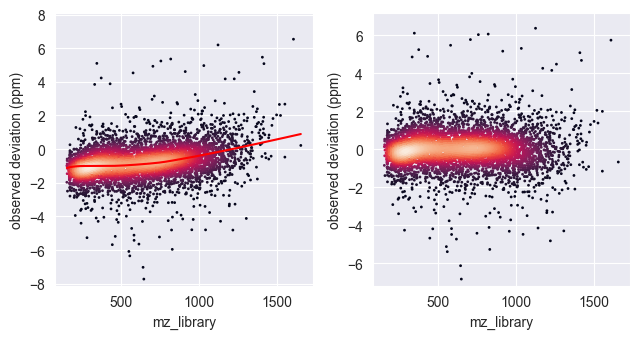

0:03:22.667680 INFO: calibration group: precursor, predicting mz
0:03:22.670263 INFO: calibration group: precursor, predicting rt
0:03:22.676867 INFO: calibration group: fragment, predicting mz
0:03:22.723321 INFO: === checking if optimization conditions were reached ===
0:03:22.728775 PROGRESS: ✅ ms2_error      : 7.0000 <= 7.0000
0:03:22.739553 PROGRESS: ❌ ms1_error      : 4.5271 > 4.0000 or insufficient steps taken.
0:03:22.740324 INFO: ==============================================
0:03:22.749502 INFO: Starting optimization step 3.
0:03:22.753989 PROGRESS: === Extracting elution groups 0 to 8000 ===
0:03:22.758605 PROGRESS: Extracting batch of 15881 precursors
0:03:22.766796 INFO: Duty cycle consists of 301 frames, 1.55 seconds cycle time
0:03:22.767433 INFO: Duty cycle consists of 1 scans, 0.00000 1/K_0 resolution
0:03:22.775399 INFO: FWHM in RT is 3.16 seconds, sigma is 0.43
0:03:22.776155 INFO: FWHM in mobility is 0.000 1/K_0, sigma is 1.00
0:03:22.779753 INFO: Starting candidate

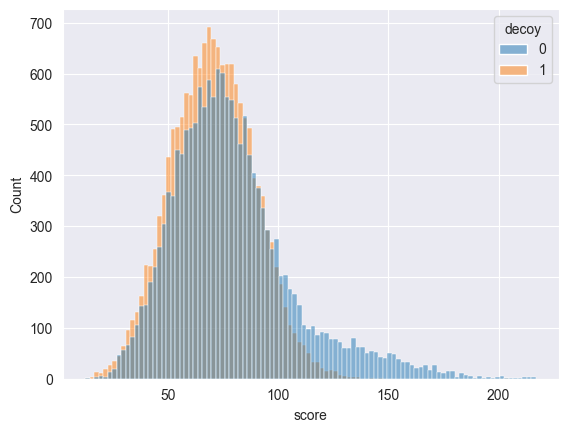

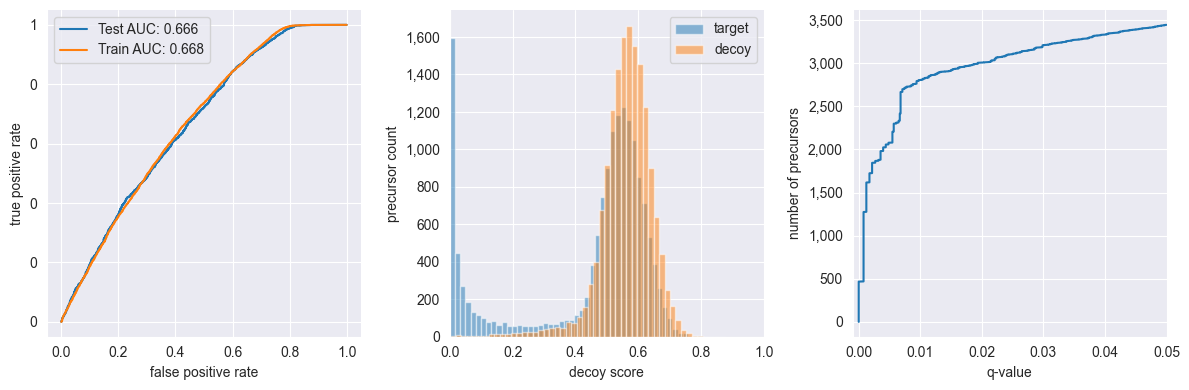

0:03:27.346650 INFO: Resetting torch num_threads to 10
0:03:27.347808 INFO: === FDR correction performed with classifier version 2 ===
0:03:27.349714 PROGRESS: ============================= Precursor FDR =============================
0:03:27.350275 PROGRESS: Total precursors accumulated: 3,512
0:03:27.350676 PROGRESS: Target precursors: 3,326 (94.70%)
0:03:27.351081 PROGRESS: Decoy precursors: 186 (5.30%)
0:03:27.351463 PROGRESS: 
0:03:27.351846 PROGRESS: Precursor Summary:
0:03:27.353777 PROGRESS: Channel   0:	 0.05 FDR: 3,281; 0.01 FDR: 2,777; 0.001 FDR: 1,274
0:03:27.354206 PROGRESS: 
0:03:27.354557 PROGRESS: Protein Summary:
0:03:27.356573 PROGRESS: Channel   0:	 0.05 FDR: 2,360; 0.01 FDR: 2,035; 0.001 FDR: 1,022
0:03:27.360241 PROGRESS: =========================================================================
0:03:27.371110 INFO: fragments_df_filtered: 5000
0:03:27.396304 INFO: calibration group: precursor, fitting mz estimator 


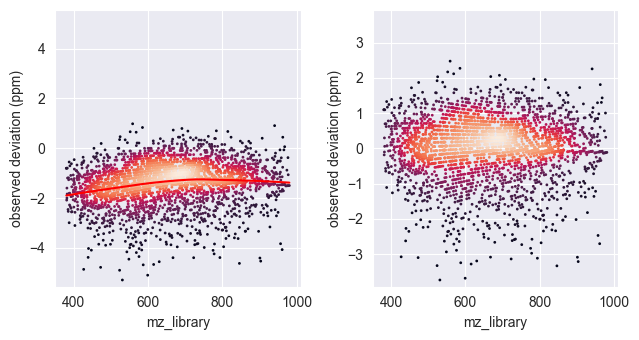

0:03:27.664822 INFO: calibration group: precursor, fitting rt estimator 


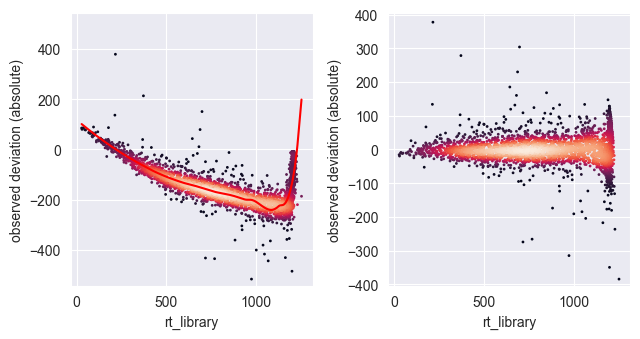

0:03:27.882660 INFO: calibration group: fragment, fitting mz estimator 


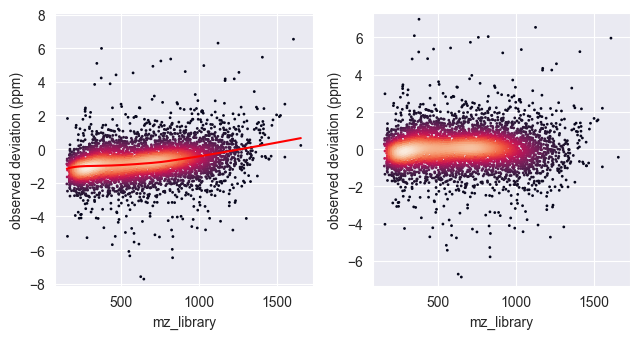

0:03:28.387308 INFO: calibration group: precursor, predicting mz
0:03:28.389370 INFO: calibration group: precursor, predicting rt
0:03:28.394410 INFO: calibration group: fragment, predicting mz
0:03:28.415907 INFO: === checking if optimization conditions were reached ===
0:03:28.417303 PROGRESS: ✅ ms2_error      : 7.0000 <= 7.0000
0:03:28.422438 PROGRESS: ✅ ms1_error      : 4.0000 <= 4.0000
0:03:28.424856 INFO: ==============================================
0:03:28.427085 PROGRESS: Optimization finished for ms2_error, ms1_error.
0:03:28.474914 INFO: calibration group: precursor, predicting mz
0:03:28.487901 INFO: calibration group: precursor, predicting rt
0:03:28.499448 INFO: calibration group: fragment, predicting mz
0:03:28.564981 INFO: Starting optimization step 0.
0:03:28.569576 PROGRESS: === Extracting elution groups 0 to 8000 ===
0:03:28.570619 PROGRESS: Extracting batch of 15881 precursors
0:03:28.575806 INFO: Duty cycle consists of 301 frames, 1.55 seconds cycle time
0:03:28.5

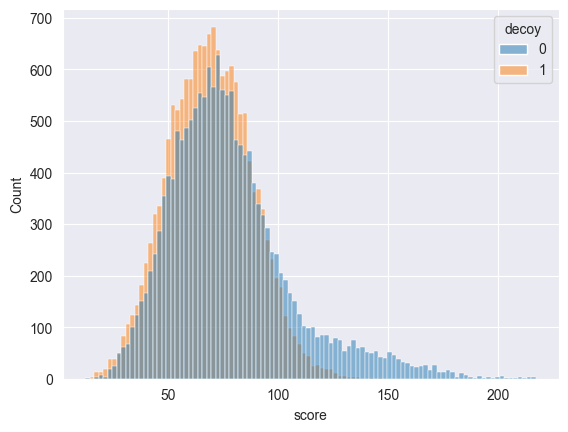

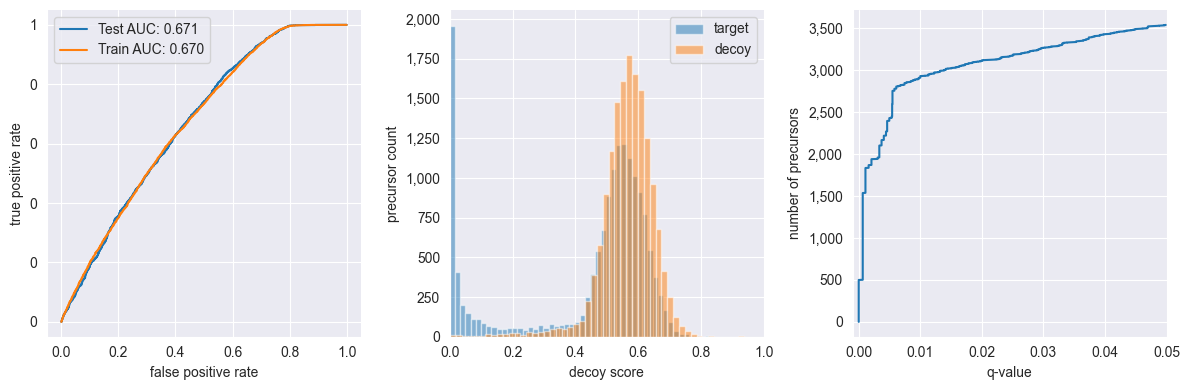

0:03:32.976758 INFO: Resetting torch num_threads to 10
0:03:32.978325 INFO: === FDR correction performed with classifier version 3 ===
0:03:32.979709 PROGRESS: ============================= Precursor FDR =============================
0:03:32.980200 PROGRESS: Total precursors accumulated: 3,615
0:03:32.980657 PROGRESS: Target precursors: 3,419 (94.58%)
0:03:32.981022 PROGRESS: Decoy precursors: 196 (5.42%)
0:03:32.981342 PROGRESS: 
0:03:32.981597 PROGRESS: Precursor Summary:
0:03:32.983629 PROGRESS: Channel   0:	 0.05 FDR: 3,369; 0.01 FDR: 2,878; 0.001 FDR: 1,534
0:03:32.984099 PROGRESS: 
0:03:32.984582 PROGRESS: Protein Summary:
0:03:32.987017 PROGRESS: Channel   0:	 0.05 FDR: 2,425; 0.01 FDR: 2,101; 0.001 FDR: 1,211
0:03:32.987449 PROGRESS: =========================================================================
0:03:32.997868 INFO: fragments_df_filtered: 5000
0:03:33.019574 INFO: calibration group: precursor, fitting mz estimator 


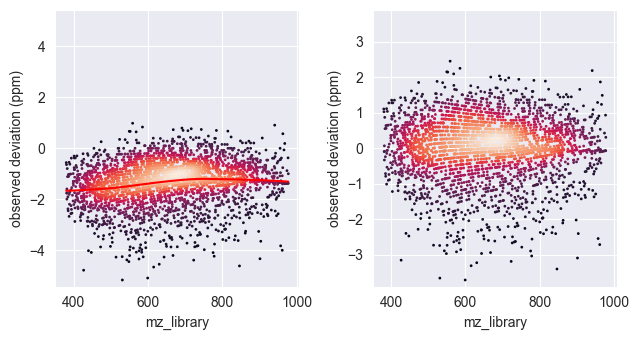

0:03:33.330521 INFO: calibration group: precursor, fitting rt estimator 


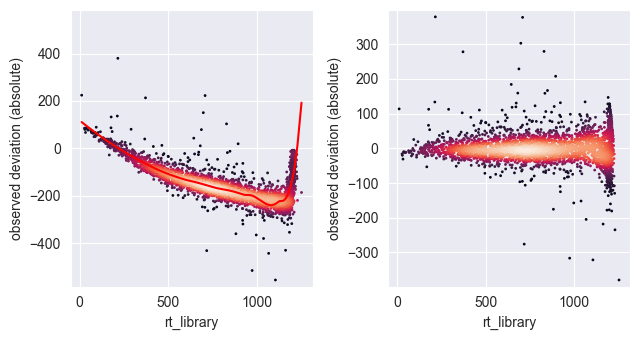

0:03:33.573238 INFO: calibration group: fragment, fitting mz estimator 


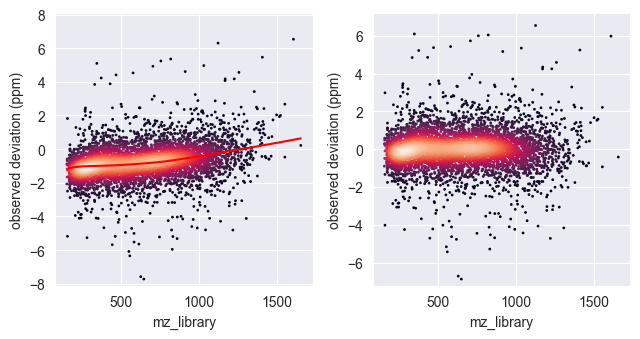

0:03:34.098699 INFO: calibration group: precursor, predicting mz
0:03:34.100781 INFO: calibration group: precursor, predicting rt
0:03:34.107033 INFO: calibration group: fragment, predicting mz
0:03:34.147026 INFO: === checking if optimization conditions were reached ===
0:03:34.153395 PROGRESS: === Optimization of rt_error has been performed 1 time(s); minimum number is 2 ===
0:03:34.167927 PROGRESS: ❌ rt_error       : optimization incomplete after 1 search(es). Will search with parameter 146.0179.
0:03:34.172903 INFO: ==============================================
0:03:34.177398 INFO: Starting optimization step 1.
0:03:34.180031 PROGRESS: === Extracting elution groups 0 to 8000 ===
0:03:34.184434 PROGRESS: Extracting batch of 15881 precursors
0:03:34.187769 INFO: Duty cycle consists of 301 frames, 1.55 seconds cycle time
0:03:34.188909 INFO: Duty cycle consists of 1 scans, 0.00000 1/K_0 resolution
0:03:34.190728 INFO: FWHM in RT is 3.04 seconds, sigma is 0.42
0:03:34.194941 INFO: FWH

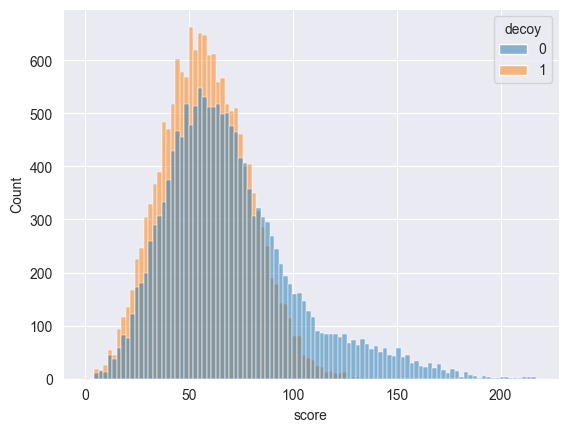

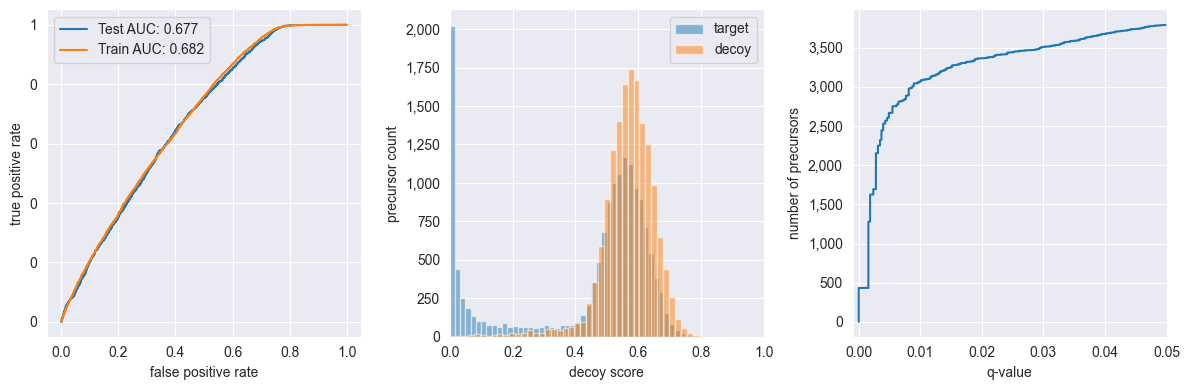

0:03:36.268088 INFO: Resetting torch num_threads to 10
0:03:36.269854 INFO: === FDR correction performed with classifier version 3 ===
0:03:36.271345 PROGRESS: ============================= Precursor FDR =============================
0:03:36.271836 PROGRESS: Total precursors accumulated: 3,879
0:03:36.272227 PROGRESS: Target precursors: 3,676 (94.77%)
0:03:36.272602 PROGRESS: Decoy precursors: 203 (5.23%)
0:03:36.272992 PROGRESS: 
0:03:36.273357 PROGRESS: Precursor Summary:
0:03:36.275314 PROGRESS: Channel   0:	 0.05 FDR: 3,612; 0.01 FDR: 3,040; 0.001 FDR:   433
0:03:36.275827 PROGRESS: 
0:03:36.276199 PROGRESS: Protein Summary:
0:03:36.278298 PROGRESS: Channel   0:	 0.05 FDR: 2,559; 0.01 FDR: 2,189; 0.001 FDR:   387
0:03:36.278874 PROGRESS: =========================================================================
0:03:36.288936 INFO: fragments_df_filtered: 5000
0:03:36.307644 INFO: calibration group: precursor, fitting mz estimator 


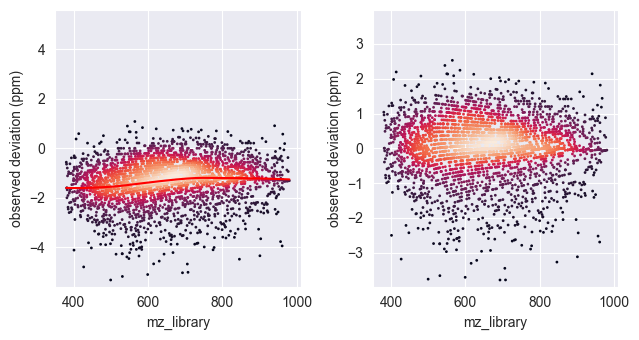

0:03:36.586305 INFO: calibration group: precursor, fitting rt estimator 


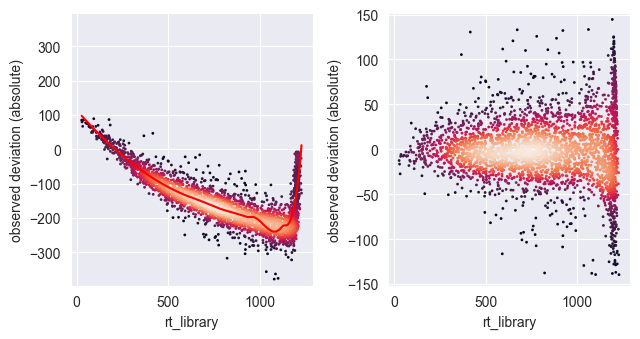

0:03:36.899239 INFO: calibration group: fragment, fitting mz estimator 


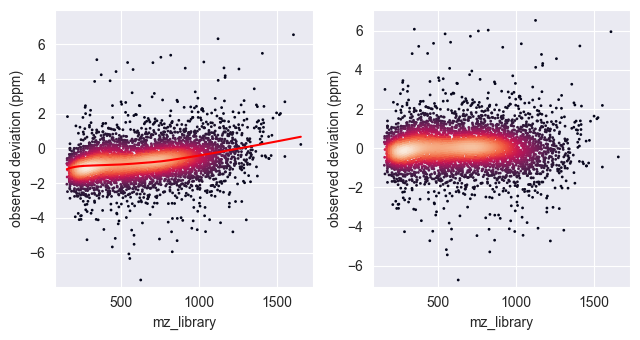

0:03:37.384505 INFO: calibration group: precursor, predicting mz
0:03:37.386568 INFO: calibration group: precursor, predicting rt
0:03:37.391523 INFO: calibration group: fragment, predicting mz
0:03:37.437055 INFO: === checking if optimization conditions were reached ===
0:03:37.438476 PROGRESS: === Optimization of rt_error has been performed 2 time(s); minimum number is 2 ===
0:03:37.454107 PROGRESS: ❌ rt_error       : optimization incomplete after 2 search(es). Will search with parameter 126.8799.
0:03:37.454651 INFO: ==============================================
0:03:37.455452 INFO: Starting optimization step 2.
0:03:37.459917 PROGRESS: === Extracting elution groups 0 to 8000 ===
0:03:37.461134 PROGRESS: Extracting batch of 15881 precursors
0:03:37.466341 INFO: Duty cycle consists of 301 frames, 1.55 seconds cycle time
0:03:37.466964 INFO: Duty cycle consists of 1 scans, 0.00000 1/K_0 resolution
0:03:37.468296 INFO: FWHM in RT is 3.01 seconds, sigma is 0.41
0:03:37.469660 INFO: FWH

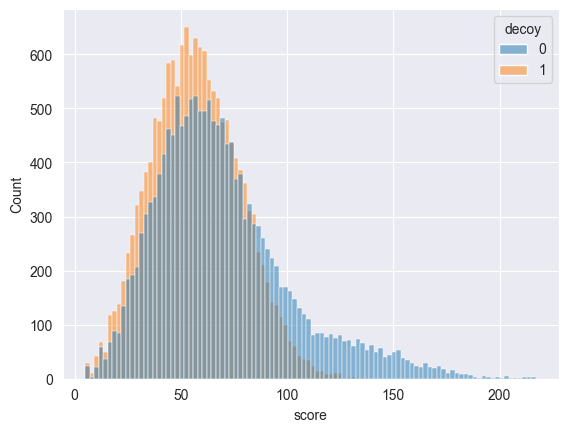

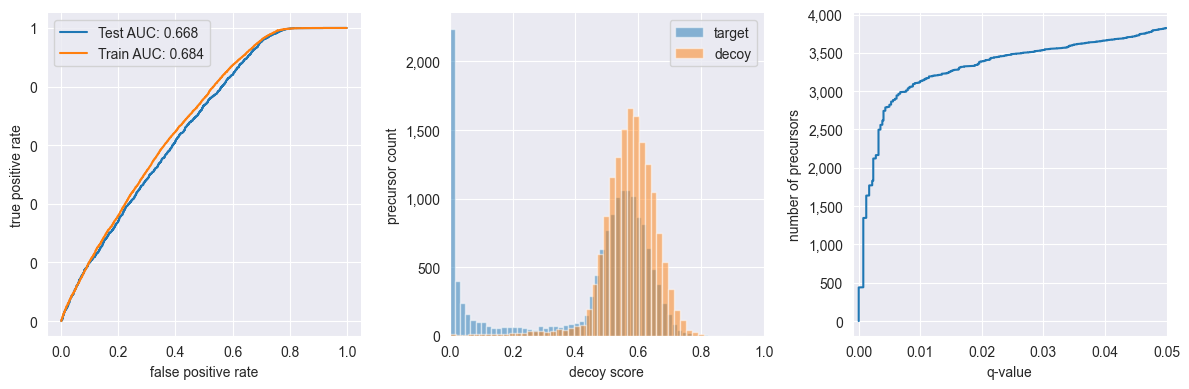

0:03:39.541401 INFO: Resetting torch num_threads to 10
0:03:39.542576 INFO: === FDR correction performed with classifier version 3 ===
0:03:39.544066 PROGRESS: ============================= Precursor FDR =============================
0:03:39.544514 PROGRESS: Total precursors accumulated: 3,966
0:03:39.544926 PROGRESS: Target precursors: 3,738 (94.25%)
0:03:39.545308 PROGRESS: Decoy precursors: 228 (5.75%)
0:03:39.545721 PROGRESS: 
0:03:39.546110 PROGRESS: Precursor Summary:
0:03:39.548218 PROGRESS: Channel   0:	 0.05 FDR: 3,644; 0.01 FDR: 3,103; 0.001 FDR: 1,345
0:03:39.548675 PROGRESS: 
0:03:39.549102 PROGRESS: Protein Summary:
0:03:39.551514 PROGRESS: Channel   0:	 0.05 FDR: 2,565; 0.01 FDR: 2,232; 0.001 FDR: 1,093
0:03:39.551938 PROGRESS: =========================================================================
0:03:39.563025 INFO: fragments_df_filtered: 5000
0:03:39.582354 INFO: calibration group: precursor, fitting mz estimator 


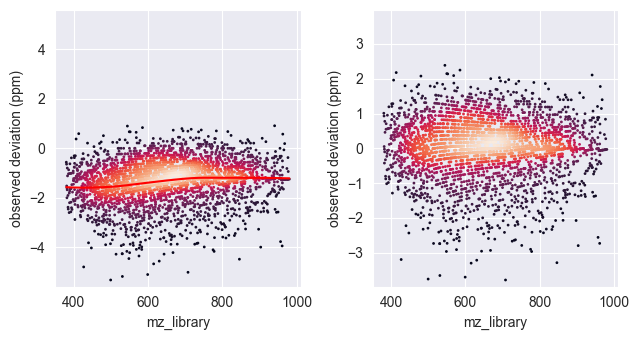

0:03:39.941146 INFO: calibration group: precursor, fitting rt estimator 


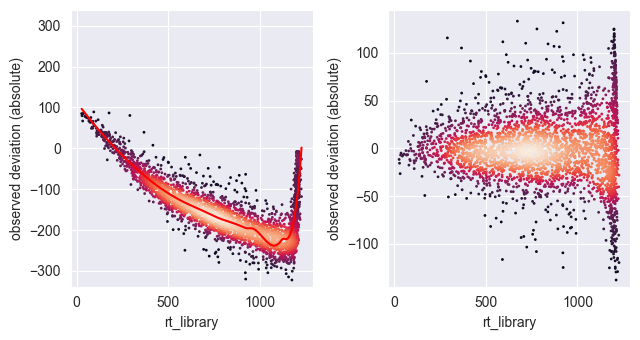

0:03:40.278419 INFO: calibration group: fragment, fitting mz estimator 


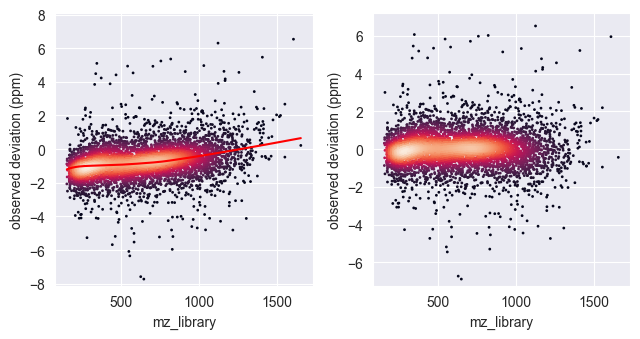

0:03:40.828371 INFO: calibration group: precursor, predicting mz
0:03:40.830512 INFO: calibration group: precursor, predicting rt
0:03:40.835724 INFO: calibration group: fragment, predicting mz
0:03:40.864727 INFO: === checking if optimization conditions were reached ===
0:03:40.867797 PROGRESS: === Optimization of rt_error has been performed 3 time(s); minimum number is 2 ===
0:03:40.883041 PROGRESS: ❌ rt_error       : optimization incomplete after 3 search(es). Will search with parameter 120.7624.
0:03:40.885415 INFO: ==============================================
0:03:40.887284 INFO: Starting optimization step 3.
0:03:40.892217 PROGRESS: === Extracting elution groups 0 to 8000 ===
0:03:40.894508 PROGRESS: Extracting batch of 15881 precursors
0:03:40.899067 INFO: Duty cycle consists of 301 frames, 1.55 seconds cycle time
0:03:40.900333 INFO: Duty cycle consists of 1 scans, 0.00000 1/K_0 resolution
0:03:40.902092 INFO: FWHM in RT is 3.00 seconds, sigma is 0.41
0:03:40.903058 INFO: FWH

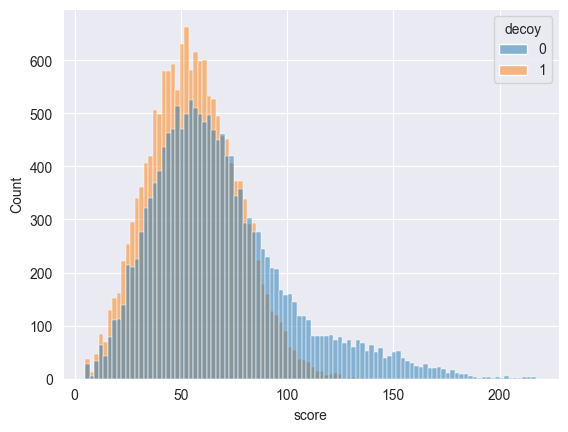

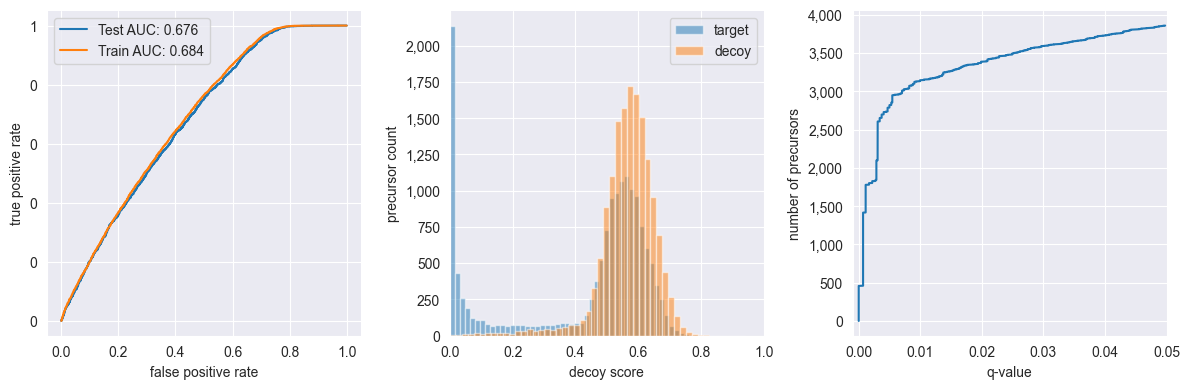

0:03:42.848484 INFO: Resetting torch num_threads to 10
0:03:42.849612 INFO: === FDR correction performed with classifier version 3 ===
0:03:42.851146 PROGRESS: ============================= Precursor FDR =============================
0:03:42.851613 PROGRESS: Total precursors accumulated: 3,957
0:03:42.852012 PROGRESS: Target precursors: 3,752 (94.82%)
0:03:42.852321 PROGRESS: Decoy precursors: 205 (5.18%)
0:03:42.852719 PROGRESS: 
0:03:42.853024 PROGRESS: Precursor Summary:
0:03:42.855083 PROGRESS: Channel   0:	 0.05 FDR: 3,676; 0.01 FDR: 3,114; 0.001 FDR: 1,415
0:03:42.855681 PROGRESS: 
0:03:42.855974 PROGRESS: Protein Summary:
0:03:42.858615 PROGRESS: Channel   0:	 0.05 FDR: 2,595; 0.01 FDR: 2,251; 0.001 FDR: 1,135
0:03:42.859105 PROGRESS: =========================================================================
0:03:42.870356 INFO: fragments_df_filtered: 5000
0:03:42.891627 INFO: calibration group: precursor, fitting mz estimator 


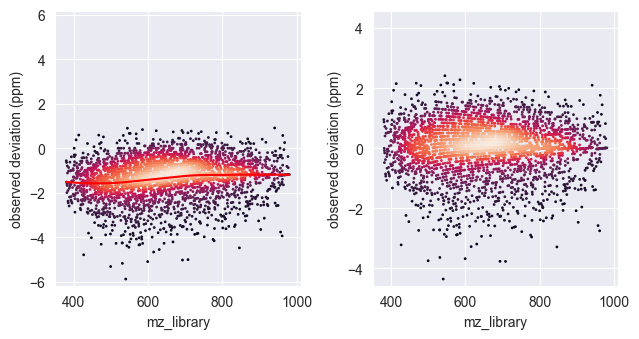

0:03:43.186347 INFO: calibration group: precursor, fitting rt estimator 


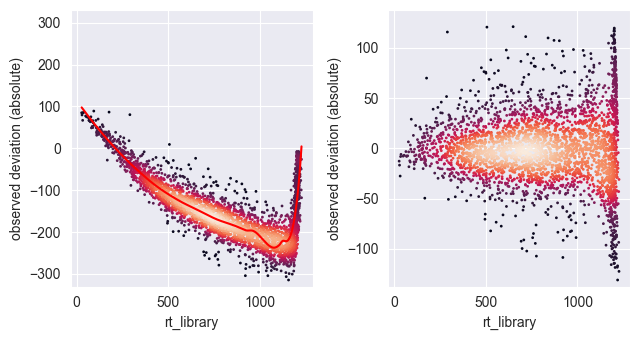

0:03:43.465926 INFO: calibration group: fragment, fitting mz estimator 


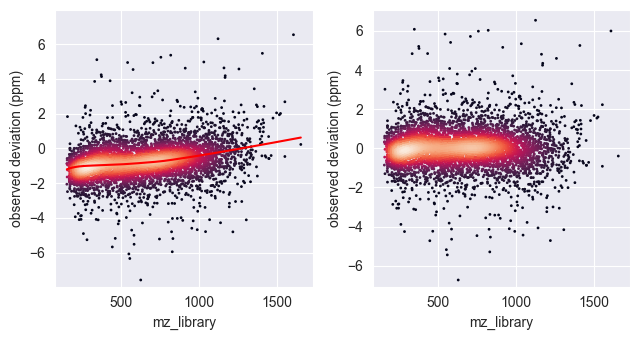

0:03:44.017239 INFO: calibration group: precursor, predicting mz
0:03:44.019300 INFO: calibration group: precursor, predicting rt
0:03:44.023318 INFO: calibration group: fragment, predicting mz
0:03:44.072780 INFO: === checking if optimization conditions were reached ===
0:03:44.076178 PROGRESS: === Optimization of rt_error has been performed 4 time(s); minimum number is 2 ===
0:03:44.081393 PROGRESS: ✅ rt_error       : optimization complete. Optimal parameter 120.7624 found after 4 searches.
0:03:44.083122 INFO: ==============================================
0:03:44.087664 PROGRESS: Optimization finished for rt_error.
0:03:44.140103 INFO: calibration group: precursor, predicting mz
0:03:44.159526 INFO: calibration group: precursor, predicting rt
0:03:44.175080 INFO: calibration group: fragment, predicting mz


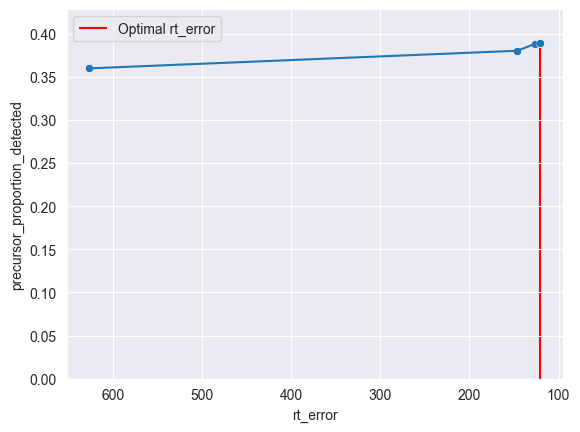

0:03:44.342420 PROGRESS: Search parameter optimization finished. Values taken forward for search are:
0:03:44.343727 PROGRESS: ==============================================
0:03:44.344677 PROGRESS: ms2_error      : 7.0000
0:03:44.345712 PROGRESS: ms1_error      : 4.0000
0:03:44.346561 PROGRESS: rt_error       : 120.7624
0:03:44.347405 PROGRESS: ==============================================
0:03:44.352408 INFO: calibration group: precursor, predicting mz
0:03:44.404146 INFO: calibration group: precursor, predicting rt
0:03:44.519704 INFO: calibration group: fragment, predicting mz
0:03:45.083054 PROGRESS: Extracting batch of 481467 precursors
0:03:45.149867 INFO: Duty cycle consists of 301 frames, 1.55 seconds cycle time
0:03:45.150747 INFO: Duty cycle consists of 1 scans, 0.00000 1/K_0 resolution
0:03:45.151450 INFO: FWHM in RT is 3.01 seconds, sigma is 0.41
0:03:45.154252 INFO: FWHM in mobility is 0.000 1/K_0, sigma is 1.00
0:03:45.157730 INFO: Starting candidate selection
100%|████

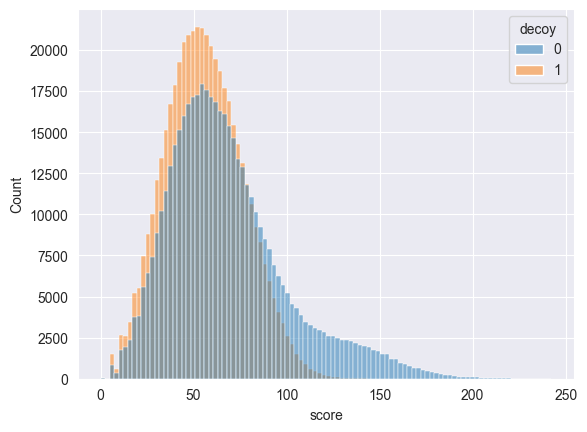

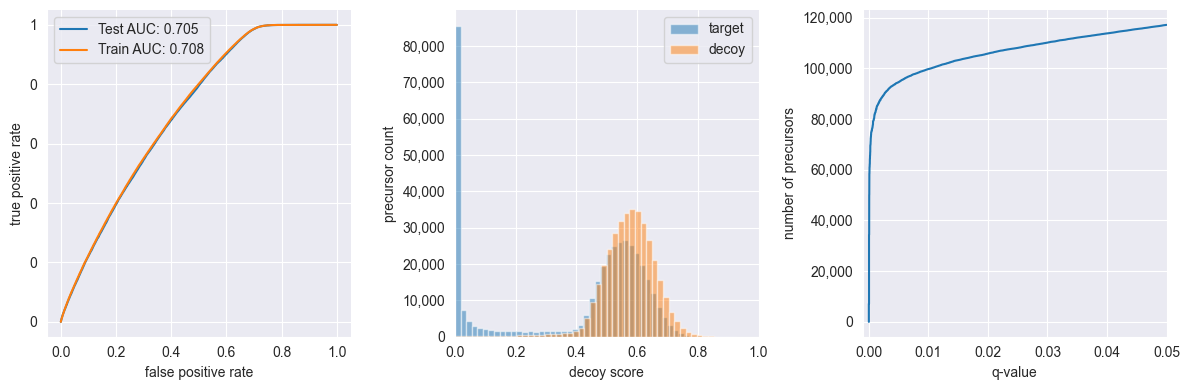

0:04:32.478920 INFO: Resetting torch num_threads to 10
0:04:32.509026 INFO: Removing fragments below FDR threshold
0:04:32.605319 PROGRESS: ============================= Precursor FDR =============================
0:04:32.606209 PROGRESS: Total precursors accumulated: 99,741
0:04:32.606648 PROGRESS: Target precursors: 98,754 (99.01%)
0:04:32.607092 PROGRESS: Decoy precursors: 987 (0.99%)
0:04:32.607524 PROGRESS: 
0:04:32.607939 PROGRESS: Precursor Summary:
0:04:32.644977 PROGRESS: Channel   0:	 0.05 FDR: 98,754; 0.01 FDR: 98,754; 0.001 FDR: 82,032
0:04:32.645606 PROGRESS: 
0:04:32.646016 PROGRESS: Protein Summary:
0:04:32.696186 PROGRESS: Channel   0:	 0.05 FDR: 10,261; 0.01 FDR: 10,261; 0.001 FDR: 9,320
0:04:32.696791 PROGRESS: =========================================================================
0:04:33.187145 INFO: Finished workflow for 20231017_OA2_TiHe_ADIAMA_HeLa_200ng_Evo011_21min_F-40_07
0:04:34.001499 PROGRESS: Processing search outputs
0:04:34.002098 PROGRESS: Performing 

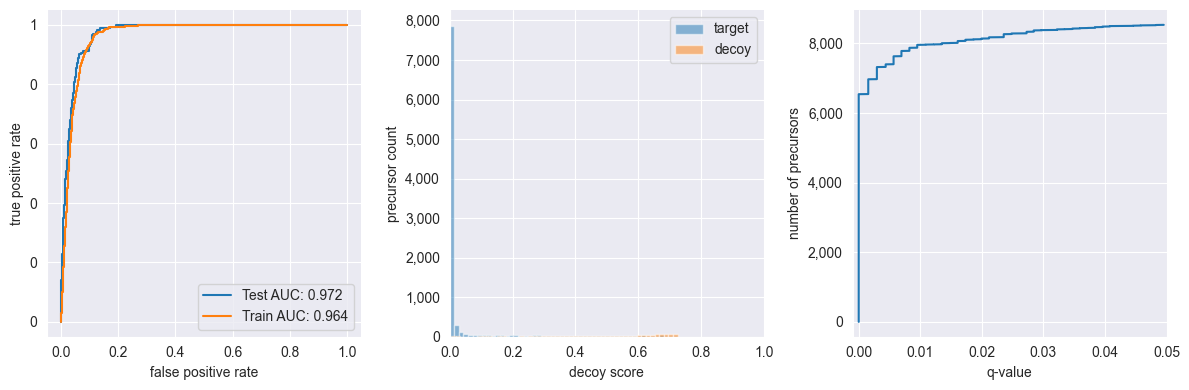

0:04:48.538930 PROGRESS: ================ Protein FDR =================
0:04:48.539462 PROGRESS: Unique protein groups in output
0:04:48.539688 PROGRESS:   1% protein FDR: 7,947
0:04:48.539954 PROGRESS: 
0:04:48.540229 PROGRESS: Unique precursor in output
0:04:48.540501 PROGRESS:   1% protein FDR: 96,524
0:04:48.540790 PROGRESS: ================================================
0:04:48.559313 PROGRESS: Building search statistics
0:04:48.590026 INFO: Loaded OptimizationManager from /Users/mschwoerer/work/hackathon/data/alphadia-validate//output/quant/20231017_OA2_TiHe_ADIAMA_HeLa_200ng_Evo011_21min_F-40_07/optimization_manager.pkl
0:04:48.590623 INFO: Initializing OptimizationManager
0:04:48.591403 INFO: Loaded CalibrationManager from /Users/mschwoerer/work/hackathon/data/alphadia-validate//output/quant/20231017_OA2_TiHe_ADIAMA_HeLa_200ng_Evo011_21min_F-40_07/calibration_manager.pkl
0:04:48.591798 INFO: Initializing CalibrationManager
0:04:48.592524 INFO: Loaded RawFileManager from /User

In [7]:
config = {
    "general": {
        "thread_count": 10,
    },
    "search": {
        "target_ms1_tolerance": 4,
        "target_ms2_tolerance": 7,
    },
    "raw_paths": raw_data_path_list,
    "library_path": library_path,
}
step = search_step.SearchStep(output_folder, config=config)
step.run()